In [ ]:
import shapely as shp # Geometrías básicas

import pyproj # Geometrías en 3D

import folium # Mapas interactivos
import pandas as pd
from matplotlib.colors import ListedColormap
import shapely as shp
import geopandas as gpd
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap


import shapely as shp
import geopandas as gpd
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap
import networkx as nx
#import geonetworkx as gnx



In [ ]:
def get_geoJson(url):

      import requests
      from io import BytesIO


      response = requests.get(url)

      if response.status_code == 200:
          geojson_content = response.content

          gdf = gpd.read_file(BytesIO(geojson_content))

      else:
          print("No se pudo descargar el archivo GeoJSON desde la URL.")
      return gdf


In [ ]:
barrios = get_geoJson("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson")
escuelas = get_geoJson("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/establecimientos-educativos/establecimientos_educativos_WGS84.geojson")

escuelas = escuelas[escuelas["sector"]==1.0]
escuelas = escuelas.loc[~escuelas['nivel'].str.contains('Superior')]
escuelas = escuelas.loc[~escuelas['nivel'].str.contains('Adultos')]

In [ ]:
escuelas_unicas = escuelas[['geometry','cui','barrio','comuna']]

escuelas_unicas.drop_duplicates(inplace=True)

escuelas_unicas.reset_index(drop=True, inplace=True)


<ipython-input-4-52bec568af66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escuelas_unicas.drop_duplicates(inplace=True)


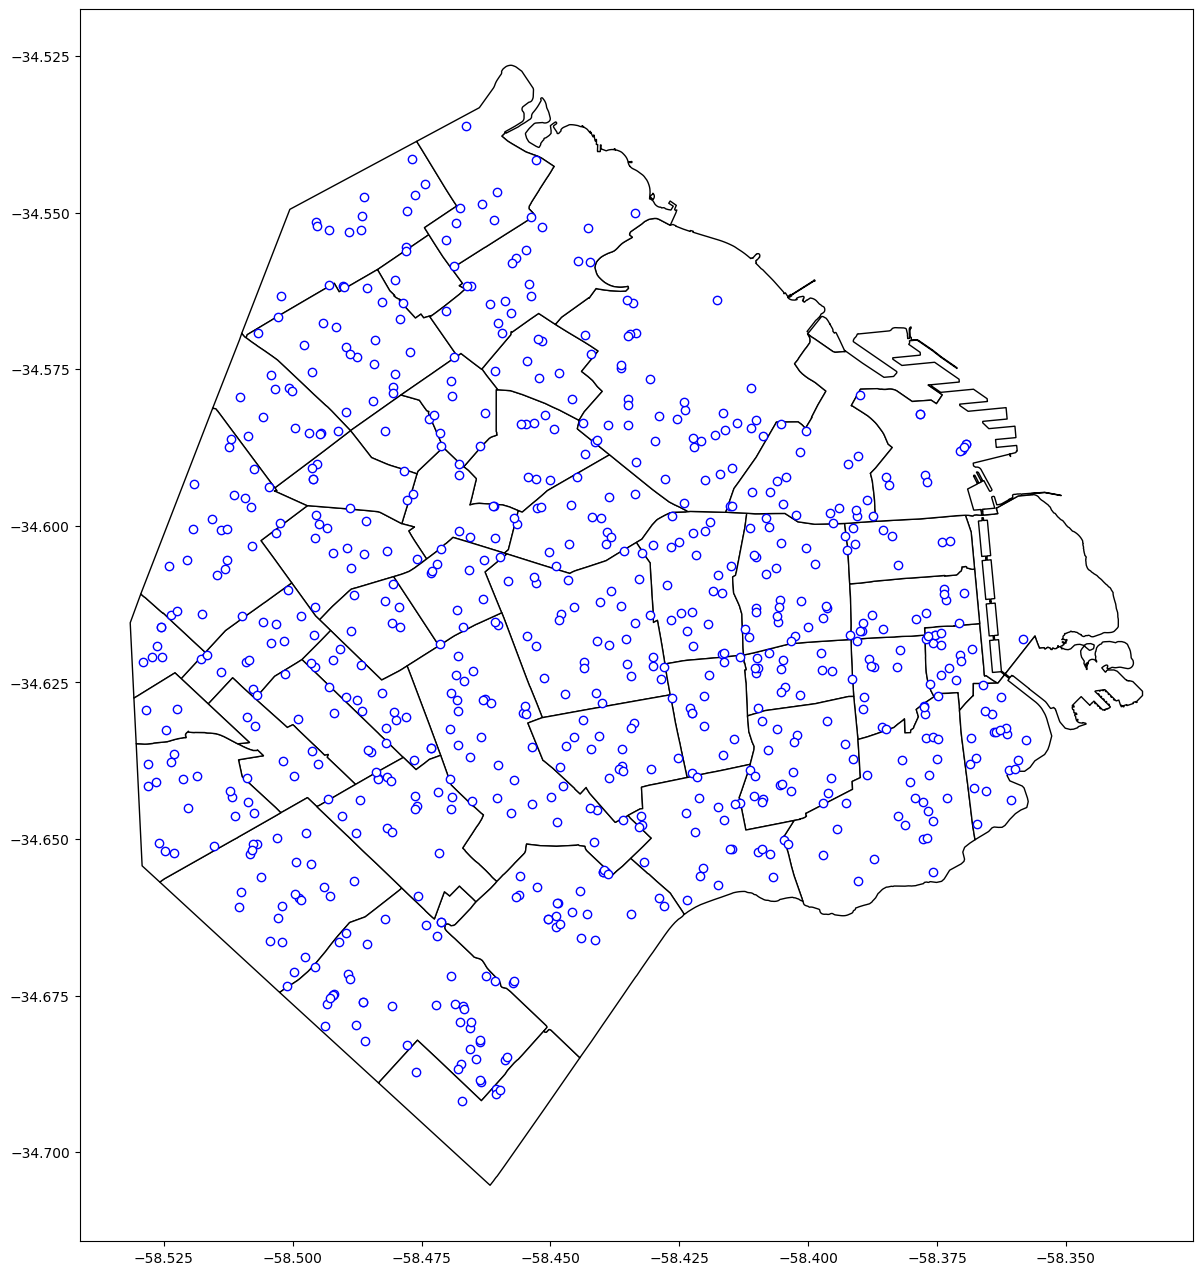

In [ ]:
fig, ax = plt.subplots(figsize=(18, 16))

ax = barrios.plot(ax=ax, edgecolor='black', facecolor='w')

ax = escuelas_unicas.plot(ax=ax, edgecolor='blue', facecolor='w')


plt.show()